# Keras Regression Code Along Project
# Part 3: Creating a Model

Usual imports, and data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../DATA/kc_house_data.csv')

## Feature engineering

In [2]:
df = df.drop('id', axis=1)
# date time
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda date : date.year)
df['month'] = df['date'].apply(lambda date : date.month)
df = df.drop('date', axis=1)

df = df.drop('zipcode',axis=1)

### Split the data

In [3]:
X = df.drop('price', axis=1).values # values to have the numpy array
y = df['price'].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Perform scaling, after split

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # We dont assume prior info from our test %set_env

### Create the model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### We want to based our number of neurons (units) in our layer from the size of the actual feature data

In [16]:
X_train.shape

(15117, 19)

We have 19 incoming features, probably to have a range of 19 neurons in our layer

In [20]:
model = Sequential()

model.add(Dense(19, activation='relu')) # Why 4 layers??
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1)) #output predicted price

model.compile(optimizer='adam',loss='mse')

### Validation data: after each epoch we quickly run test data and check loss on test data
to track how well performing model on train and test data, this will <b>NOT</b> adjust our weights or biases in our network

 * *validation_data*: Importat to have them in numpy arrays forms, nice plot to see if we're overfitting


because is  large dataset, we'll fit in batches:


 * *batch_size*: usually powers of 2, the smaller the longer will take the training, but <b>less likely to overfit</b>! (because youre not passing entire dataset at once)

In [22]:
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
         batch_size=128, epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 6s 417us/sample - loss: 430240484408.9680 - val_loss: 418918654295.8618
Epoch 2/400
15117/15117 [==============================] - 1s 97us/sample - loss: 429165608152.5593 - val_loss: 415111405345.5012
Epoch 3/400
15117/15117 [==============================] - 2s 124us/sample - loss: 413150036138.1586 - val_loss: 377801060766.6568
Epoch 4/400
15117/15117 [==============================] - 1s 89us/sample - loss: 332204597788.2808 - val_loss: 247490837759.3679
Epoch 5/400
15117/15117 [==============================] - 2s 100us/sample - loss: 176851105679.1480 - val_loss: 110653639186.9630
Epoch 6/400
15117/15117 [==============================] - 1s 88us/sample - loss: 102570620489.4622 - val_loss: 95476297434.7062
Epoch 7/400
15117/15117 [==============================] - 1s 84us/sample - loss: 97810621257.5807 - val_loss: 93857973751.1506
Epoch 8/400
15117/15117 [================

Explore model history

In [23]:
model.history.history

{'loss': [430240484408.9679,
  429165608152.5594,
  413150036138.1586,
  332204597788.28076,
  176851105679.14798,
  102570620489.46219,
  97810621257.58073,
  96063904297.2865,
  94298378049.24893,
  92495514295.13051,
  90635362011.77695,
  88774720219.57373,
  86742640205.25554,
  84734287004.40775,
  82555607587.32553,
  80340144361.83264,
  77984347098.26976,
  75568967229.13382,
  73112206236.6279,
  70563563355.12495,
  67992122103.48191,
  65400138673.62678,
  62896361896.04181,
  60597845454.99133,
  58488882372.37335,
  56579355298.673546,
  55019244173.26824,
  53671466635.84573,
  52502540561.83211,
  51514944677.078255,
  50620782640.90706,
  49867204837.09096,
  49105634873.06953,
  48403078680.82609,
  47785666970.62962,
  47180328023.45016,
  46620121530.39889,
  46072989653.866776,
  45604684182.7008,
  45121519594.32374,
  44692400160.1757,
  44248758008.29477,
  43873722281.02401,
  43499424275.5425,
  43108656256.63505,
  42786334217.38175,
  42453025865.63154,
  42

In [24]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302405e+11,4.189187e+11
1,4.291656e+11,4.151114e+11
2,4.131500e+11,3.778011e+11
3,3.322046e+11,2.474908e+11
4,1.768511e+11,1.106536e+11
...,...,...
395,2.939011e+10,2.720241e+10
396,2.940734e+10,2.716350e+10
397,2.937438e+10,2.712839e+10
398,2.935342e+10,2.716781e+10


Notice that when convert into a dataframe it show *loss* and *val_loss* columns;

the <b>val_loss</b> is the loss on the test set (validation data).

Now is possible directly compare the loss on training vs the loss on test (or validation) in order to see precence of <b>overfitting</b>

In [25]:
losses = pd.DataFrame(model.history.history)

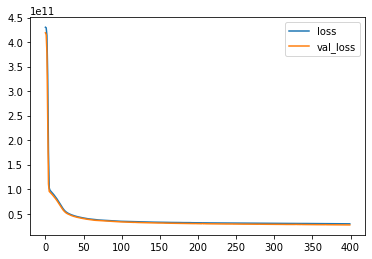

In [26]:
losses.plot()

This is the behavior that we wanted to see, decrease in both variables, and no increase in validation set.

###### Technically we can continue training

#### If val_loss eventually increases, means overfitting

# Evaluation on test data

Errors in terms of the target units (price, $USD)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [30]:
predictions = model.predict(X_test)

In [31]:
predictions

array([[406776.66],
       [586576.5 ],
       [591038.2 ],
       ...,
       [411804.16],
       [565179.3 ],
       [682256.2 ]], dtype=float32)

In [32]:
mean_squared_error(y_test, predictions)

27100555269.39583

In [34]:
mean_squared_error(y_test, predictions) ** 0.5

164622.46283358728

In [35]:
mean_absolute_error(y_test, predictions)

101046.57492766203

In [42]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

### Error about 20%, not so good actually (but not horrible)

In [44]:
mean_absolute_error(y_test, predictions) * 100 / 5.402966e+05  

18.702056412655946

Why tho? we can use explained variance score (`best = 1.0`) to figure it out

In [45]:
explained_variance_score(y_test, predictions)

0.7956523556462562

Depends on the context; 
 * do we have previous model with better performance?
 * we could still training to keep lowering the loss since we are not overfitting yet.
 
lets compare our predictions and plot them out vs a perfect fit

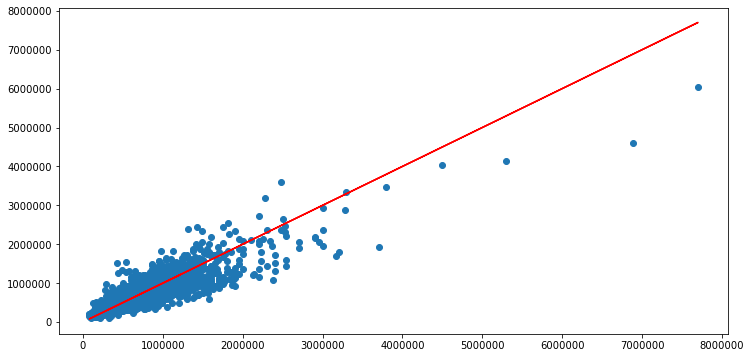

In [50]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, c='r')

Currently we are not good predicting very expensive houses , but pretty good on houses from 0 to 2 million dollars

##### Maybe worth to re-train the model just on buttom 99% of houses

# Predict the price of a brand new house!

In [51]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [52]:
df.drop('price', axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [53]:
new_house = df.drop('price', axis=1).iloc[0]

### We'll scale the feature because our model was trained with scaled features

In [55]:
new_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [56]:
scaler.transform(new_house.values.reshape(-1,19))

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [57]:
new_house = scaler.transform(new_house.values.reshape(-1,19))

### Predict the price

In [73]:
model.predict(new_house)

286095.84

Original price:

In [62]:
df['price'].iloc[0]

221900.0

In [74]:
abs(df['price'].iloc[0] - model.predict(new_house)[0][0])

64195.84375

$64195.84375 difference, not soo good, so we consider our previous options to procede, for now, we are done